In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cols = pd.read_csv("Churn.csv", nrows=1).columns
df=pd.read_csv("Churn.csv", usecols=cols[1:])
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619.0,West,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608.0,Central,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502.0,West,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699.0,West,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850.0,Central,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Null value check
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        3
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasChckng          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# Findind NaN in the dataset
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        3
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasChckng          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df['CreditScore'].fillna(df['CreditScore'].median(), inplace=True)

In [6]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasChckng          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  float64
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasChckng        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.497300,38.943500,5.015400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.694095,10.613726,2.902931,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,305.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,717.250000,44.000000,7.250000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,865.000000,190.000000,30.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Finding unique values
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          462
Geography              3
Gender                 3
Age                   72
Tenure                12
Balance             6382
NumOfProducts          4
HasChckng              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# Dropping the columns with more no. of unique values
df1=df.drop(['CustomerId','Surname'], axis=1) 
df1.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,619.0,West,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Central,Female,41,1,83807.86,1,0,1,112542.58,0


In [11]:
# One Hot encoding of Categorical variables
Geography= pd.get_dummies(df1['Geography'], drop_first=True)
Gender = pd.get_dummies(df1['Gender'], drop_first=True)
df_final= pd.concat([Geography,Gender,df1], axis=1)
df_final.head()

,East,West,Male,Neutral,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,0,1,0,0,619.0,West,Female,42,2,0.00,1,1,1,101348.88,1
1,0,0,0,0,608.0,Central,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,1,0,0,502.0,West,Female,42,8,159660.80,3,1,0,113931.57,1
3,0,1,0,0,699.0,West,Female,39,1,0.00,2,0,0,93826.63,0
4,0,0,0,0,850.0,Central,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df_final=df_final.drop(['Geography','Gender'], axis=1)
df_final.head(2)

,East,West,Male,Neutral,CreditScore,Age,Tenure,Balance,NumOfProducts,HasChckng,IsActiveMember,EstimatedSalary,Exited
0,0,1,0,0,619.0,42,2,0.00,1,1,1,101348.88,1
1,0,0,0,0,608.0,41,1,83807.86,1,0,1,112542.58,0


In [13]:
# Assigning the Independent and dependent variables
X= df_final.drop(['Exited'], axis=1)
y= df_final['Exited']

### Feature Selection

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

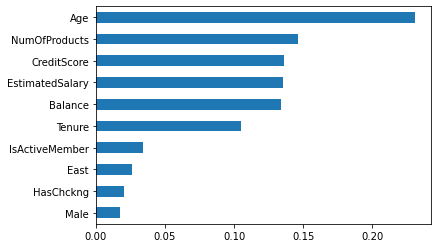

In [15]:
feature= pd.Series(model.feature_importances_, index=X.columns)
feature.nlargest(10).sort_values().plot(kind='barh')
plt.show()

### Drawing Attrition data Insights

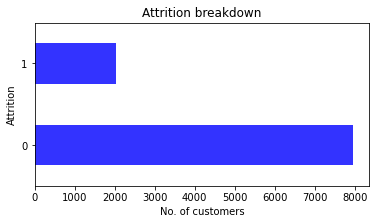

In [16]:
#explore Attrition data for all customers
plt.figure(figsize=(6,3))
df1['Exited'].value_counts().plot(kind='barh',color='blue',alpha=.8)
plt.title('Attrition breakdown')
plt.ylabel('Attrition')
plt.xlabel("No. of customers")
plt.show()

In [17]:
df1['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### There are little more than 2000 CWM clients who have exited and we still have close to 8000 CWM clients who are with the firm.

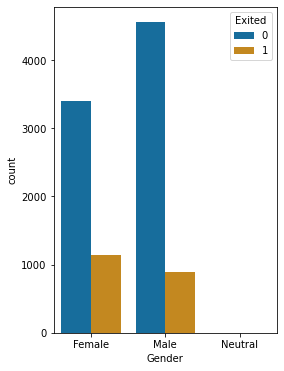

In [18]:
plt.subplots(figsize=(4,6))
sns.countplot(x= 'Gender',hue = 'Exited',data = df1,palette='colorblind')

#### Attrition count of Females are more than male and Neutral gender customers

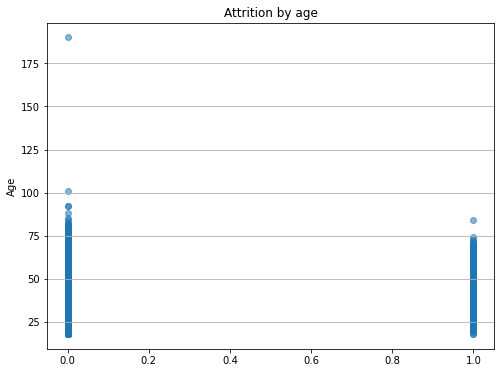

In [19]:
#exploring attrition by age
plt.figure(figsize=(8,6))
plt.scatter(df1['Exited'],df1['Age'],alpha=.55)
plt.title("Attrition by age")
plt.ylabel('Age')
plt.grid(which='major',axis='y')
plt.show()

#### 1. Clients within age group of 75 years are most likely to churn and clients above 75 years will continue their service with CWM unit. 

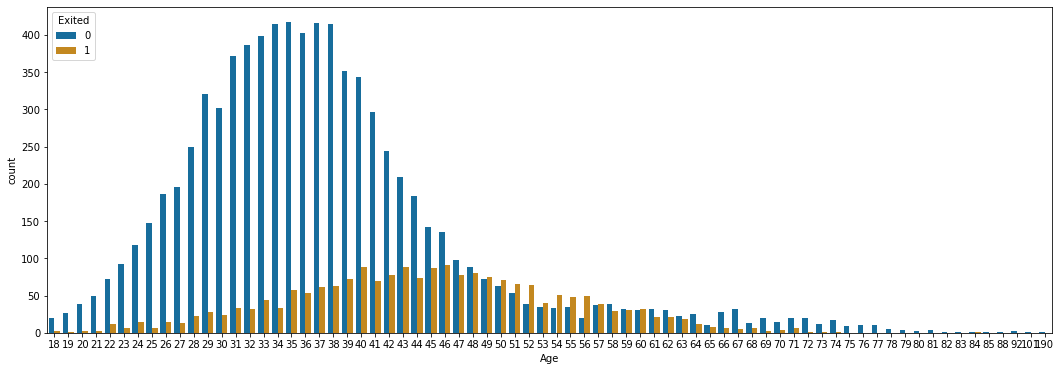

In [20]:
plt.subplots(figsize=(18,6))
sns.countplot(x= 'Age',hue = 'Exited',data = df1,palette='colorblind')

#### 2. Majority of attrition happened between age group 33-56 years.

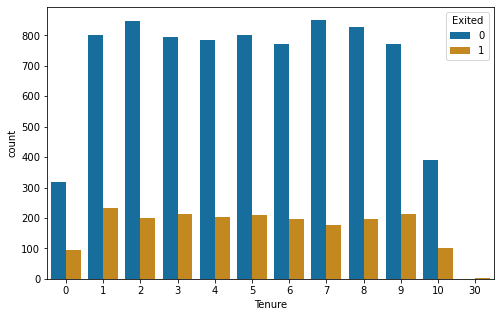

In [21]:
plt.subplots(figsize=(8,5))
sns.countplot(x= 'Tenure',hue = 'Exited',data = df1,palette='colorblind')

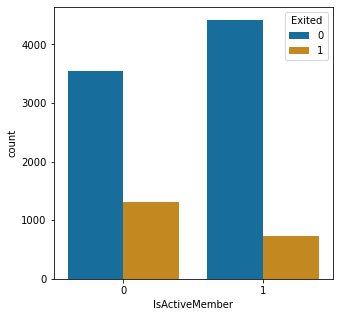

In [22]:
plt.subplots(figsize=(5,5))
sns.countplot(x= 'IsActiveMember',hue = 'Exited',data = df1,palette='colorblind')

#### Customers with tenure between 1-5 years and those who are digitally inactive are going to churn.

In [23]:
import sys
df1['CreditScore']= pd.cut(df1['CreditScore'],
                           bins=[0,350,400,450,500,550,600,650,700,750,800,sys.maxsize],
                           labels=['0-350','350-400','400-450','450-500','500-550','550-600','600-650',
                                   '650-700','700-750','750-800','800+'])

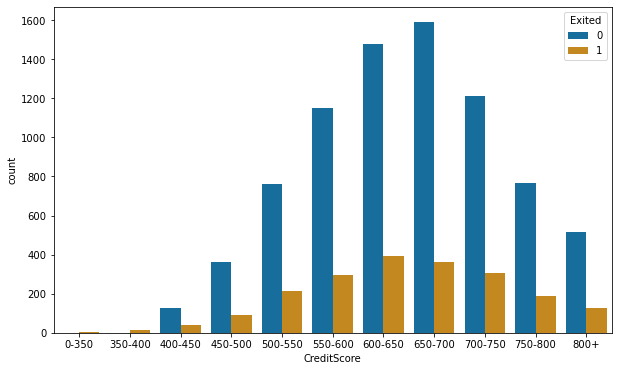

In [24]:
#plotting the Attrition for Credit score in Barchart
plt.subplots(figsize=(10,6))
sns.countplot(x= 'CreditScore',hue = 'Exited',data = df1,palette='colorblind')

#### Customers with Credit score between 550-750 are more likely to attrite.

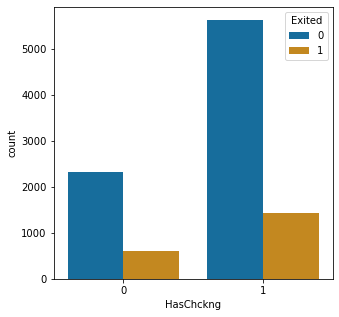

In [25]:
plt.subplots(figsize=(5,5))
sns.countplot(x= 'HasChckng',hue = 'Exited',data = df1,palette='colorblind')

#### Customers who have Checking account are most likely to attrite

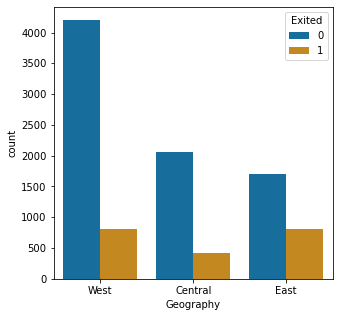

In [26]:
plt.subplots(figsize=(5,5))
sns.countplot(x= 'Geography',hue = 'Exited',data = df1,palette='colorblind')

#### Clients from East and West region has high attrition rate than Central.

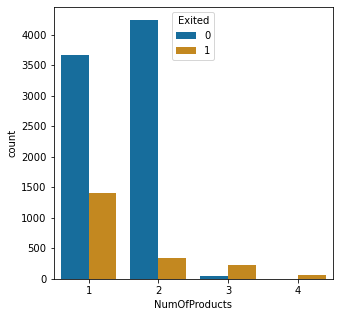

In [27]:
plt.subplots(figsize=(5,5))
sns.countplot(x= 'NumOfProducts',hue = 'Exited',data = df1,palette='colorblind')

#### Customers who have 1 product with JPMC are most likely to attrite

### Finding and removal of Outliers

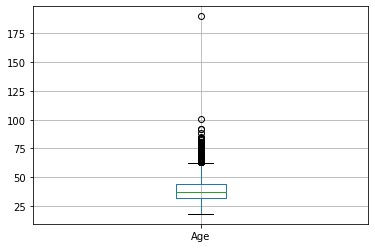

In [28]:
df_final.boxplot(column='Age') #Outlier

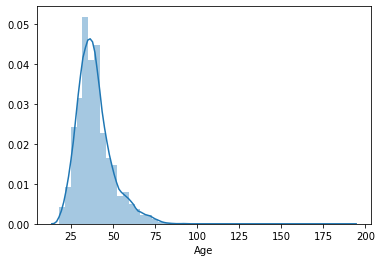

In [29]:
sns.distplot(df_final['Age'])

In [30]:
IQR= df_final['Age'].quantile(0.75)-df_final['Age'].quantile(0.25)
print("IQR value:", IQR)
lower_boundary= df_final['Age'].quantile(0.25) - (IQR*1.5)
upper_boundary= df_final['Age'].quantile(0.75) + (IQR*1.5)
print("lower_boundary value:",lower_boundary)
print("Upper_boundary value:",upper_boundary)

IQR value: 12.0
lower_boundary value: 14.0
Upper_boundary value: 62.0


In [31]:
df_final.loc[df_final['Age']>=62, 'Age'] = 62

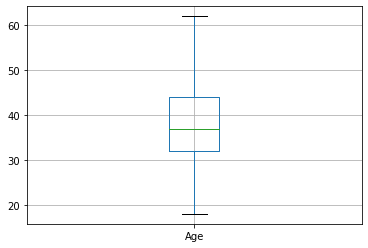

In [32]:
df_final.boxplot(column='Age')

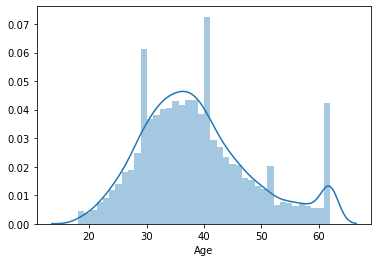

In [33]:
sns.distplot(df_final['Age'])

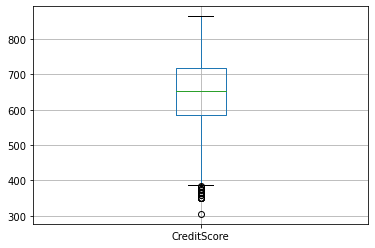

In [34]:
df_final.boxplot(column='CreditScore') #Outlier

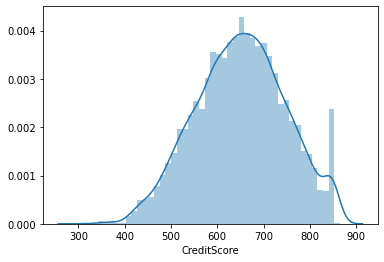

In [35]:
sns.distplot(df_final['CreditScore'])

In [36]:
IQR= df_final['CreditScore'].quantile(0.75)-df_final['CreditScore'].quantile(0.25)
print("IQR value:", IQR)
lower_boundary= df_final['CreditScore'].quantile(0.25) - (IQR*1.5)
upper_boundary= df_final['CreditScore'].quantile(0.75) + (IQR*1.5)
print("lower_boundary value:",lower_boundary)
print("Upper_boundary value:",upper_boundary)

IQR value: 133.25
lower_boundary value: 384.125
Upper_boundary value: 917.125


In [37]:
df_final.loc[df_final['CreditScore']<=385, 'CreditScore'] = 385

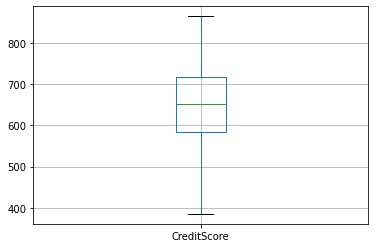

In [38]:
df_final.boxplot(column='CreditScore')

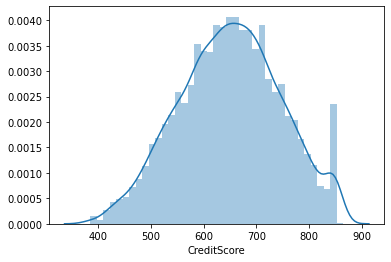

In [39]:
sns.distplot(df_final['CreditScore'])

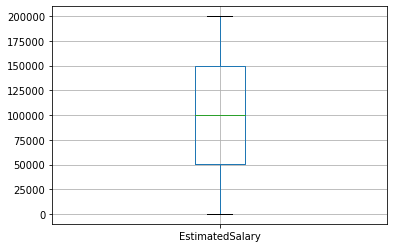

In [40]:
df_final.boxplot(column='EstimatedSalary') # No Outlier

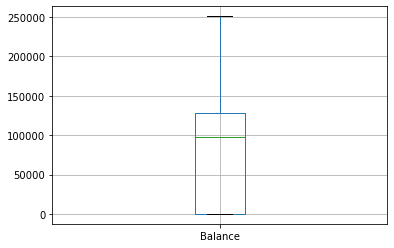

In [41]:
df_final.boxplot(column='Balance') # No Outlier

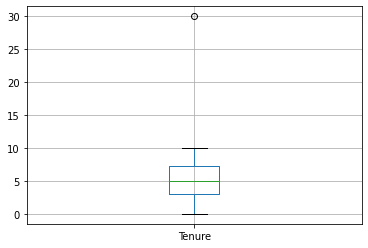

In [42]:
df_final.boxplot(column='Tenure') #Outlier

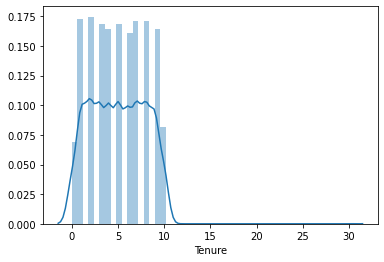

In [43]:
sns.distplot(df_final['Tenure'])

In [44]:
IQR= df_final['Tenure'].quantile(0.75)-df_final['Tenure'].quantile(0.25)
print("IQR value:", IQR)
lower_boundary= df_final['Tenure'].quantile(0.25) - (IQR*1.5)
upper_boundary= df_final['Tenure'].quantile(0.75) + (IQR*1.5)
print("lower_boundary value:",lower_boundary)
print("Upper_boundary value:",upper_boundary)

IQR value: 4.25
lower_boundary value: -3.375
Upper_boundary value: 13.625


In [45]:
df_final.loc[df_final['Tenure']>=13.6, 'Tenure'] = 13.6

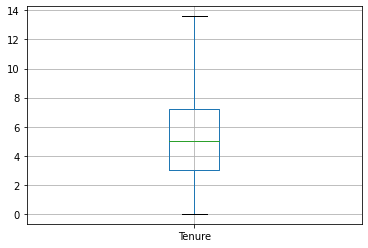

In [46]:
df_final.boxplot(column='Tenure')

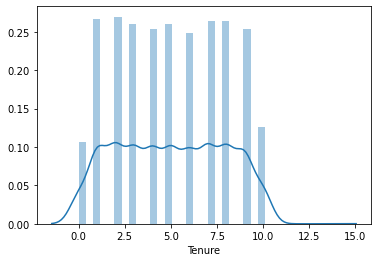

In [47]:
sns.distplot(df_final['Tenure'])

### Model Building

In [48]:
#Splitting the dataset into the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [49]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)

[[-0.56987189  0.98497008  0.92402032 ...  0.64198477  0.96683535
  -0.76862426]
 [-0.56987189  0.98497008  0.92402032 ...  0.64198477 -1.03430227
  -1.39359887]
 [-0.56987189  0.98497008 -1.08222728 ... -1.55766936  0.96683535
  -1.49739308]
 ...
 [-0.56987189  0.98497008  0.92402032 ...  0.64198477 -1.03430227
   1.41400417]
 [-0.56987189 -1.01525927 -1.08222728 ...  0.64198477  0.96683535
   0.84625811]
 [ 1.75478035 -1.01525927 -1.08222728 ...  0.64198477 -1.03430227
   0.32689267]]


In [50]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logm=LogisticRegression()
logm.fit(X_train,y_train)
y_pred=logm.predict(X_test)

### Model Validation

In [51]:
#Making the Confusion Matrix and finding f1-score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2299   80]
 [ 493  128]]
0.809
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2379
           1       0.62      0.21      0.31       621

    accuracy                           0.81      3000
   macro avg       0.72      0.59      0.60      3000
weighted avg       0.78      0.81      0.77      3000



### K-Fold Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(estimator = logm,X = X_train, y = y_train, cv=10)
cv=cv.mean()
print("Accuracy: {:.2f} %".format(cv*100))

Accuracy: 80.97 %


### Model building & validation using Random Forest

In [54]:
#Train the training set based on Random Forest Algo
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [55]:
#Making the Confusion Matrix and finding f1-score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2291   88]
 [ 299  322]]
0.871
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.79      0.52      0.62       621

    accuracy                           0.87      3000
   macro avg       0.83      0.74      0.77      3000
weighted avg       0.86      0.87      0.86      3000



In [56]:
probs = classifier.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,probs))

0.8685458307696368


### Model building & validation using xgboost

In [57]:
#import sys
#!{sys.executable} -m pip install xgboost

In [58]:
import xgboost
clf=xgboost.XGBClassifier(n_estimators=200)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

C:\Users\Sneha\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [59]:
#Making the Confusion Matrix and finding f1-score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2232  147]
 [ 296  325]]
0.8523333333333334
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2379
           1       0.69      0.52      0.59       621

    accuracy                           0.85      3000
   macro avg       0.79      0.73      0.75      3000
weighted avg       0.84      0.85      0.84      3000



In [60]:
probs = clf.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,probs[:,1]))

0.8515953129875676


## Thank you!!